<a href="https://colab.research.google.com/github/Vish-shubh/Air-index-quality-check./blob/main/numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('city_day.csv')
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [ ]:

df.shape

(29531, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [ ]:
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [ ]:
for i in df.columns:
    print('column name:{}    unique values:{}'.format(i,df[i].nunique()))

column name:City    unique values:26
column name:Date    unique values:2009
column name:PM2.5    unique values:11716
column name:PM10    unique values:12571
column name:NO    unique values:5776
column name:NO2    unique values:7404
column name:NOx    unique values:8156
column name:NH3    unique values:5922
column name:CO    unique values:1779
column name:SO2    unique values:4761
column name:O3    unique values:7699
column name:Benzene    unique values:1873
column name:Toluene    unique values:3608
column name:Xylene    unique values:1561
column name:AQI    unique values:829
column name:AQI_Bucket    unique values:6


In [ ]:
df['PM2.5']=df['PM2.5'].fillna(df['PM2.5'].mean())
df['PM10']=df['PM10'].fillna(df['PM10'].mean())
df['NO']=df['NO'].fillna(df['NO'].mean())
df['NO2']=df['NO2'].fillna(df['NO2'].mean())
df['NOx']=df['NOx'].fillna(df['NOx'].mean())
df['NH3']=df['NH3'].fillna(df['NH3'].mean())
df['CO']=df['CO'].fillna(df['CO'].mean())
df['SO2']=df['SO2'].fillna(df['SO2'].mean())
df['O3']=df['O3'].fillna(df['O3'].mean())
df['Benzene']=df['Benzene'].fillna(df['Benzene'].mean())
df['Toluene']=df['Toluene'].fillna(df['Toluene'].mean())
df['Xylene']=df['Xylene'].fillna(df['Xylene'].mean())
df['AQI']=df['AQI'].fillna(df['AQI'].mode()[0])
df['AQI_Bucket']=df['AQI_Bucket'].fillna('Moderate')

In [ ]:
# WE ARE FILLING MISSING VALUES IN 2 DIFFERENT CATEGORIES

# FOR NUMERIC VALUES : MEAN()

# FOR CATEGORICAL VALUES : MODE()

In [ ]:
df.isnull().sum()

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

In [ ]:
# Population in each city

In [ ]:
Avg_polluted = df[['City', 'AQI', 'PM10', 'CO']].groupby(['City']).mean().sort_values(by = 'AQI', ascending = False)
Avg_polluted

,AQI,PM10,CO
City,,,
Ahmedabad,334.485814,117.409318,16.147420
Delhi,258.703833,228.413747,1.976053
Lucknow,211.276755,118.127103,2.131976
Patna,210.979010,119.013316,1.591700
Gurugram,208.550923,150.467320,1.321857
Talcher,155.490811,156.552639,1.911862
Jorapokhar,139.759624,142.240508,1.358846
Guwahati,139.579681,116.604900,0.738284
Brajrajnagar,138.699360,123.094114,1.870288


In [ ]:
# highly polution city are Ahmedabad, Delhi, Lucknow

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'AQI')

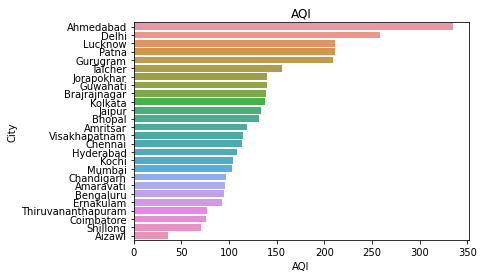

In [ ]:
sns.barplot(Avg_polluted.AQI,Avg_polluted.index)
plt.title('AQI')

Text(0.5, 1.0, 'pm10')

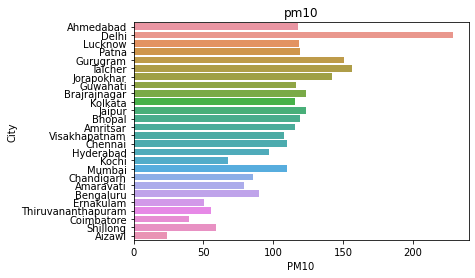

In [ ]:
sns.barplot(x = Avg_polluted.PM10,y = Avg_polluted.index)
plt.title('pm10')

Text(0.5, 1.0, 'CO')

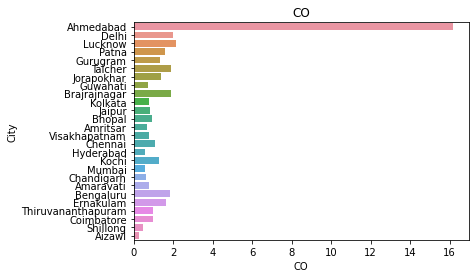

In [ ]:
sns.barplot(x = Avg_polluted.CO,y = Avg_polluted.index)
plt.title('CO')

In [ ]:
# AS THERE ARE MANY POLUTANTS IN THE AIR WE ARE CLASSIFYING THEM INTO 2 CATEGORIES

# VEHICLE_POLUTANTS : PM2.5 , PM10 , NO , NOx , NH3 , CO

# INDUSTRY_POLUTANT : SO2 , O3 , BENZENE , TOLUENE , XYLENE



In [ ]:
df1=df.copy()
df1['Vehicle_Pollution_content']=df1['PM2.5']+df1['PM10']+df1['NO']+df1['NOx']+df1['NH3']+df1['CO']
df1['Industry_pollutants']=df1['SO2']+df1['O3']+df1['Benzene']+df1['Toluene']+df1['Xylene']
df1.drop(['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene'],axis=1,inplace=True)
df1.head()

,City,Date,AQI,AQI_Bucket,Vehicle_Pollution_content,Industry_pollutants
0,Ahmedabad,2015-01-01,102.0,Moderate,228.051157,161.02
1,Ahmedabad,2015-01-02,102.0,Moderate,227.461157,71.56
2,Ahmedabad,2015-01-03,102.0,Moderate,273.561157,85.22
3,Ahmedabad,2015-01-04,102.0,Moderate,230.431157,70.24
4,Ahmedabad,2015-01-05,102.0,Moderate,291.021157,107.32


In [ ]:
df1['Day_date']=pd.to_datetime(df1['Date'],format='%Y/%m/%d').dt.day
df1['month_date']=pd.to_datetime(df1['Date'],format='%Y/%m/%d').dt.month
df1.drop(['Date'],axis=1,inplace=True)
df1.head()

,City,AQI,AQI_Bucket,Vehicle_Pollution_content,Industry_pollutants,Day_date,month_date
0,Ahmedabad,102.0,Moderate,228.051157,161.02,1,1
1,Ahmedabad,102.0,Moderate,227.461157,71.56,2,1
2,Ahmedabad,102.0,Moderate,273.561157,85.22,3,1
3,Ahmedabad,102.0,Moderate,230.431157,70.24,4,1
4,Ahmedabad,102.0,Moderate,291.021157,107.32,5,1


In [ ]:
df1.describe()

,AQI,Vehicle_Pollution_content,Industry_pollutants,Day_date,month_date
count,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000
mean,156.245369,261.193608,64.075348,15.762758,6.267143
std,131.194189,152.524948,44.544707,8.804537,3.431974
min,13.000000,7.040000,3.340000,1.000000,1.000000
25%,88.000000,171.455000,41.090000,8.000000,3.000000
50%,103.000000,238.610000,54.410128,16.000000,6.000000
75%,179.000000,301.453841,73.275550,23.000000,9.000000
max,2049.000000,2123.690000,971.490128,31.000000,12.000000


In [ ]:

outliers=df1.loc[df1['Vehicle_Pollution_content'] > (1000)]
outliers

,City,AQI,AQI_Bucket,Vehicle_Pollution_content,Industry_pollutants,Day_date,month_date
1746,Ahmedabad,1595.0,Severe,1015.963476,68.251977,13,10
3143,Amritsar,110.0,Moderate,1060.519123,58.961940,8,5
3145,Amritsar,102.0,Moderate,1051.349123,46.141940,10,5
3545,Amritsar,732.0,Severe,1182.568598,43.250000,14,6
3546,Amritsar,869.0,Severe,1126.858598,44.130000,15,6
...,...,...,...,...,...,...,...
25728,Shillong,102.0,Moderate,1906.180000,37.720128,2,9
25729,Shillong,102.0,Moderate,1909.260000,34.870128,3,9
26096,Talcher,474.0,Severe,1074.490000,100.160128,22,2
26106,Talcher,484.0,Severe,1163.670000,86.670128,4,3


In [ ]:
outliers=df1.loc[df1['Industry_pollutants']>(800)]
outliers


,City,AQI,AQI_Bucket,Vehicle_Pollution_content,Industry_pollutants,Day_date,month_date
25873,Shillong,68.0,Satisfactory,102.99,910.650128,25,1
25874,Shillong,74.0,Satisfactory,105.60,925.730128,26,1
25906,Shillong,60.0,Satisfactory,50.26,848.800128,27,2
25907,Shillong,42.0,Good,46.68,842.080128,28,2
25908,Shillong,51.0,Satisfactory,49.98,944.340128,29,2
25909,Shillong,53.0,Satisfactory,69.49,908.970128,1,3
25910,Shillong,60.0,Satisfactory,88.69,917.070128,2,3
25911,Shillong,63.0,Satisfactory,71.86,916.140128,3,3
25912,Shillong,64.0,Satisfactory,90.79,947.480128,4,3
25913,Shillong,63.0,Satisfactory,65.67,918.770128,5,3


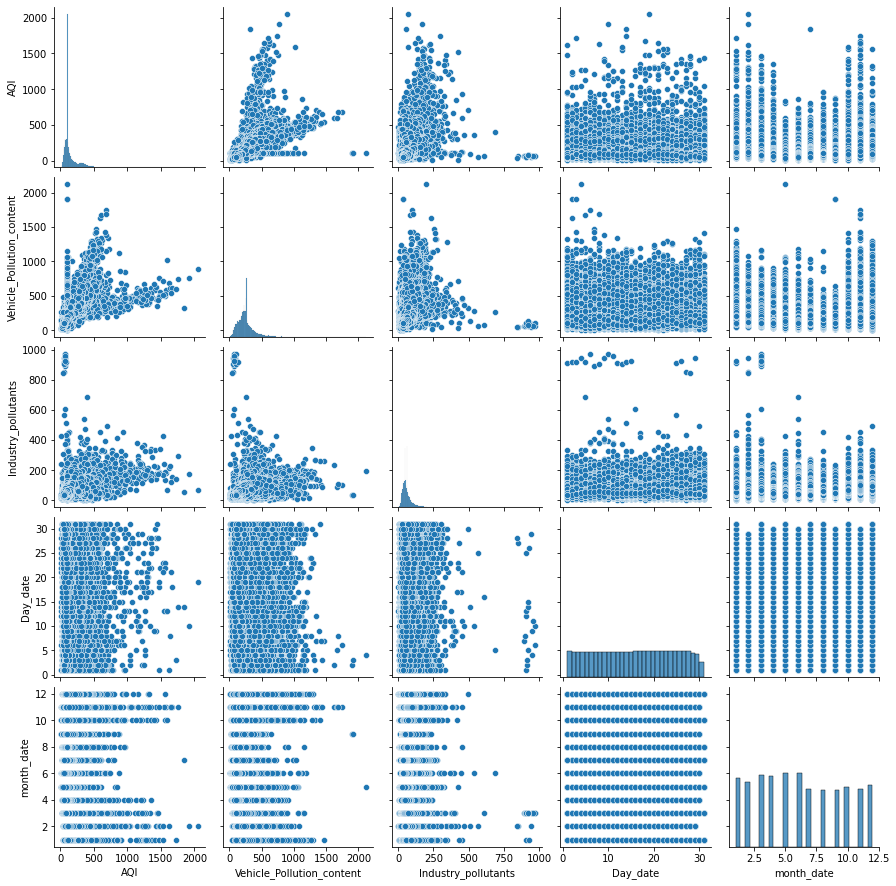

In [ ]:
sns.pairplot(df1)

In [ ]:
df1.drop(['AQI_Bucket'],axis=1,inplace=True)
df1.head()

,City,AQI,Vehicle_Pollution_content,Industry_pollutants,Day_date,month_date
0,Ahmedabad,102.0,228.051157,161.02,1,1
1,Ahmedabad,102.0,227.461157,71.56,2,1
2,Ahmedabad,102.0,273.561157,85.22,3,1
3,Ahmedabad,102.0,230.431157,70.24,4,1
4,Ahmedabad,102.0,291.021157,107.32,5,1


In [ ]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

KeyError: ignored

In [11]:
df1=pd.get_dummies(df1,drop_first=True)
print(df1.shape)
df1.head()

In [11]:
X=df1.drop(['AQI'],axis=1)
y=df1['AQI']
print(X.shape)
print(y.shape)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import RandomForestRegressor
model3=RandomForestRegressor()
model3.fit(X_train,y_train)
model3.score(X_test,y_test)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
model3=GradientBoostingRegressor()
model3.fit(X_train,y_train)
model3.score(X_test,y_test)


In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
model3=ExtraTreesRegressor()
model3.fit(X_train,y_train)
model3.score(X_test,y_test)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from scipy.stats import randint as sp_randint
from sklearn.metrics import mean_squared_error,make_scorer

clf = ExtraTreesRegressor(random_state=12)
param_dist = {"n_estimators": [5, 10],
              "max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(1, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False]}
# rmse = make_scorer(mean_squared_error, greater_is_better=False)
r = RandomizedSearchCV(clf, param_distributions=param_dist,
                       cv=10,
                       scoring='r2',
                       n_iter=3,
                       n_jobs=2)
r.fit(X, y)

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train,y_train)


In [ ]:
rf_random.best_params_

In [ ]:
rf_random.score(X_test,y_test)

In [ ]:
prediction=rf_random.predict(X_test)